<a href="https://colab.research.google.com/github/chendasiv/software2023/blob/main/7han.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python
!pip install matplotlib
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=d7a5d0e5f672fed92c041b481e7a1604757e153491975bb75d2a2a054a0583d1
  Stored in directory: /root/.cache/pip/wheels/b4/4b/8f/751e99d45f089bdf366a7d3e5066db3c2b84a62e4377f534d7
Successfully built face-recognition-models


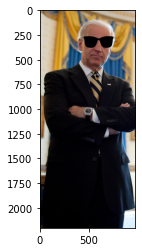

In [ ]:
# tk.py
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import face_recognition
import numpy as np
import cv2

class Sunglass_collage:

    def __init__(self, picture) :
        self.img1 = picture

  # jpg画像のロード,顔認識
    def Make_list(self) :
        img2 = face_recognition.load_image_file("sunglass.jpg")
        face_landmarks_list = face_recognition.face_landmarks(self.img1)
        return face_landmarks_list,img2

  # 左目に関する座標の列ごと(x,y)の最大、最小を抜き出す
    def Left_eye_max_min(self,face_landmarks) :
        l_eye_max = np.array(face_landmarks['left_eye']).max(axis=0)
        l_eye_min = np.array(face_landmarks['left_eye']).min(axis=0)

        return l_eye_max[0],l_eye_min[0],l_eye_max[1],l_eye_min[1]

  # 右目バージョン
    def Right_eye_max_min(self,face_landmarks) :
        r_eye_max = np.array(face_landmarks['right_eye']).max(axis=0)
        r_eye_min = np.array(face_landmarks['right_eye']).min(axis=0)

        return r_eye_max[0],r_eye_min[0],r_eye_max[1],r_eye_min[1]
  # 輪郭バージョン
    def Chin_max_min(self,face_landmarks) :
        chin_max = np.array(face_landmarks['chin']).max(axis=0)
        chin_min = np.array(face_landmarks['chin']).min(axis=0)

        return chin_max[0],chin_min[0],chin_max[1],chin_min[1]

  # x座標の最大(今回の場合右の眼の最大のx)、最小(今回の場合左目の最小)座標を抜き出し、サングラスの画像をいい感じに合わせるために倍率を調整
    def Adj_x(self,chin_xmax, chin_xmin, r_eye_xmax, l_eye_xmin) :
        shift_x = (chin_xmax - chin_xmin) / 4

        xmax = int(r_eye_xmax + shift_x)
        xmin = int(l_eye_xmin - shift_x)

        return xmax,xmin

  # 上のy座標バージョン
    def Adj_y(self,chin_ymax, chin_ymin, l_eye_ymax,l_eye_ymin, r_eye_ymax, r_eye_ymin):
        shift_base_y = (chin_ymax - chin_ymin)

        ymx = max(l_eye_ymax,r_eye_ymax)
        ymn = min(l_eye_ymin,r_eye_ymin)

        ymax = int(ymx + shift_base_y / 9)
        ymin = int(ymn - shift_base_y / 4.5)

        return ymax,ymin

  # 調整したサングラスの画像を重ねる場所のサイズの計算
    def Size_calc(self,xmax, xmin, ymax, ymin):
        x_size = xmax - xmin
        y_size = ymax - ymin

        return x_size,y_size

    def Synthesis(self,x_size, y_size, img2, xmax, xmin, ymax, ymin):
        # サングラスの画像の大きさを上で計算した通りにリサイズ
        img2 = cv2.resize(img2,(x_size,y_size))

        # img1からサングラスの画像を重ねる部分の切り出し(画像を重ねる際、画像の大きさが同じでなければならないため)
        rows,cols,channels = img2.shape
        roi = self.img1[ymin:ymax,xmin:xmax]
        plt.imshow(roi)

        # 切り出した部分に画像を重ねる
        final_roi = cv2.bitwise_and(roi,img2)

        #large_img = img1
        small_img = final_roi

        # 切り出して画像を重ねた画像をもと画像のもとの位置に合成
        self.img1[ymin:ymin+small_img.shape[0], xmin:xmin+small_img.shape[1]] = small_img

        return self.img1

    def Sunglass(self):
        face_landmarks_list,img2 = self.Make_list()

    # face_landmarksリストに入る
        for face_landmarks in face_landmarks_list:

            l_eye_xmax,l_eye_xmin,l_eye_ymax,l_eye_ymin = self.Left_eye_max_min(face_landmarks)

            r_eye_xmax,r_eye_xmin,r_eye_ymax,r_eye_ymin = self.Right_eye_max_min(face_landmarks)

            chin_xmax,chin_xmin,chin_ymax,chin_ymin = self.Chin_max_min(face_landmarks)

            xmax,xmin = self.Adj_x(chin_xmax, chin_xmin, r_eye_xmax, l_eye_xmin)

            ymax,ymin = self.Adj_y(chin_ymax, chin_ymin, l_eye_ymax,l_eye_ymin, r_eye_ymax, r_eye_ymin)

            x_size,y_size = self.Size_calc(xmax, xmin, ymax, ymin)

            img1 = self.Synthesis(x_size, y_size, img2, xmax, xmin, ymax, ymin)

            return img1

if __name__ == "__main__" :

    img1 = face_recognition.load_image_file("biden.jpg")

    sunglass = Sunglass_collage(img1)

    img3 = sunglass.Sunglass()

    plt.imshow(img3)


https://www.irasutoya.com/2017/02/5_27.html
https://www.irasutoya.com/2019/04/blog-post_87.html

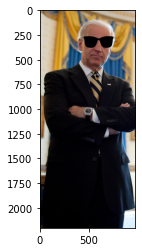

In [ ]:
# sym.py
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import face_recognition
import numpy as np
import cv2

class Sunglass_collage:

  def __init__(self, picture) :
    self.img1 = picture

  def Sunglass(self) :
    # jpg画像のロード
    img2 = face_recognition.load_image_file("sunglass.jpg")

    face_landmarks_list = face_recognition.face_landmarks(self.img1)

    # face_landmarksリストに入る
    for face_landmarks in face_landmarks_list:

      # 左目に関する座標の列ごと(x,y)の最大、最小を抜き出す
      l_eye_max = np.array(face_landmarks['left_eye']).max(axis=0)
      l_eye_min = np.array(face_landmarks['left_eye']).min(axis=0)

      # わかりやすいように配列から変数へ ただ、なおのことわかりずらくなってしまった気がする。
      l_eye_xmax = l_eye_max[0]
      l_eye_ymax = l_eye_max[1]
      l_eye_xmin = l_eye_min[0]
      l_eye_ymin = l_eye_min[1]

      # 上の右目バージョン
      r_eye_max = np.array(face_landmarks['right_eye']).max(axis=0)
      r_eye_min = np.array(face_landmarks['right_eye']).min(axis=0)

      r_eye_xmax = r_eye_max[0]
      r_eye_ymax = r_eye_max[1]
      r_eye_xmin = r_eye_min[0]
      r_eye_ymin = r_eye_min[1]

      chin_max = np.array(face_landmarks['chin']).max(axis=0)
      chin_min = np.array(face_landmarks['chin']).min(axis=0)

      chin_xmax = chin_max[0]
      chin_xmin = chin_min[0]
      chin_ymax = chin_max[1]
      chin_ymin = chin_min[1]

      # x座標の最大(今回の場合右の眼の最大のx)、最小(今回の場合左目の最小)座標を抜き出し、サングラスの画像をいい感じに合わせるために倍率を調整
      shift_x = (chin_xmax - chin_xmin) / 4

      xmax = int(r_eye_xmax + shift_x)
      xmin = int(l_eye_xmin - shift_x)

      # 上のy座標バージョン
      shift_base_y = (chin_ymax - chin_ymin)

      ymx = max(l_eye_ymax,r_eye_ymax)
      ymn = min(l_eye_ymin,r_eye_ymin)

      ymax = int(ymx + shift_base_y / 9)
      ymin = int(ymn - shift_base_y / 4.5)


      # 調整したサングラスの画像を重ねる場所のサイズの計算
      x_size = xmax - xmin
      y_size = ymax - ymin

      # サングラスの画像の大きさを上で計算した通りにリサイズ
      img2 = cv2.resize(img2,(x_size,y_size))

      # img1からサングラスの画像を重ねる部分の切り出し(画像を重ねる際、画像の大きさが同じでなければならないため)
      rows,cols,channels = img2.shape
      roi = self.img1[ymin:ymax,xmin:xmax]
      plt.imshow(roi)

      # 切り出した部分に画像を重ねる
      final_roi = cv2.bitwise_and(roi,img2)

      #large_img = img1
      small_img = final_roi

      # 切り出して画像を重ねた画像をもと画像のもとの位置に合成
      self.img1[ymin:ymin+small_img.shape[0], xmin:xmin+small_img.shape[1]] = small_img

      return self.img1

if __name__ == "__main__" :

  img1 = face_recognition.load_image_file("biden.jpg")

  sunglass = Sunglass_collage(img1)

  img3 = sunglass.Sunglass()

  plt.imshow(img3)
  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# face.py
import face_recognition
import numpy as np
from PIL import Image, ImageDraw

import glob
import os

def face_func(dic_dir, unk_dir):
    #print(dic_dir)
    #print(unk_dir)
    dic = sorted(glob.glob(dic_dir + '/*.jpg'))
    unk = sorted(glob.glob(unk_dir + '/*.jpg')) #unknown
    known_face_encodings = []
    known_face_names = []

    for img in dic:
        name = os.path.splitext(os.path.basename(img))[0]

        people_image = face_recognition.load_image_file(img)
        if len(face_recognition.face_encodings(people_image)) != 0:
          people_encoding = face_recognition.face_encodings(people_image)[0]

          known_face_encodings.append(people_encoding)
          known_face_names.append(name)

        else :
          print(img + ':Error')

    for img in unk:
        print(img)
        unknown_image = face_recognition.load_image_file(img)

        face_locations = face_recognition.face_locations(unknown_image)
        face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

        pil_image = Image.fromarray(unknown_image)

        draw = ImageDraw.Draw(pil_image)

        for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
            name = "Unknown"

            face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_face_names[best_match_index]

            draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

            text_width, text_height = draw.textsize(name)
            draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
            draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))
            print(name)

            del draw

            # ここの分類をどうするか？
            pil_image.show()

if __name__ == "__main__" :

    dic_dir = '_dic/'
    unk_dir = '_img/'

    face_func(dic_dir, unk_dir)

_dic/eito.jpg 1
_dic/remoteworks458A3475_TP_V4.jpg 0
_dic/remoteworks458A3475_TP_V4.jpg:Error
_dic/takahiro.jpg 1
_img/eito.jpg
eito
_img/kuchikomi747_TP_V4.jpg
takahiro
_img/ookawa221061296_TP_V4.jpg
